In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

#실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline

iris = load_iris()

feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

#kmeans 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)

#데이터당 클러스터값 할당
irisDF['cluster'] = kmeans.labels_

print(irisDF.shape)
irisDF.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [2]:
#iris 의 모든 개별 데이ㅌ에 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape',score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가 
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print(f'붓꽃 데이터셋 Silhouette Analysis Score:{average_score}')

irisDF.head(15)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.5528190123564095


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [4]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

<AxesSubplot:>

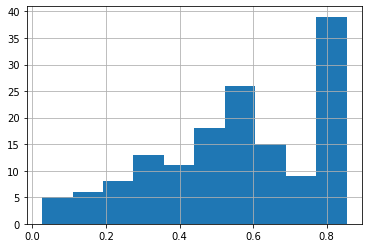

In [3]:
irisDF['silhouette_coeff'].hist()

# setosa는 군집화가 잘 되었지만, verginica 와 virsicolor는 잘 되지 않음 
# 실루엣 계수가 1에 가까울수록 군집화가 잘 된 거임

In [9]:
print(iris.target_names)
print(iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# 여러개의 클러스터링 갯수를 List로 입력받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples,silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 작용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.Subplots()으로 리스테 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig,axs = plt.subplots(figsize=(4*n_cols,4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링을 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        cluster = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = cluster.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features,cluster_labels)
        
        y_lower = 10 
        axs[ind].set_title('Number of Cluster:' + str(n_cluster)+'\n' \
                            'Silhouette Score:' + str(round(sil_avg,3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1,1])
        axs[ind].set_ylim([0, len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0,0.2,0.4,0.6,0.8,1])
        
        # 클러스터링 갯수별로 fill_betweenx() 형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower,y_upper), 0, ith_cluster_sil_values,facecolor=color, edgecolor = color, alpha=0.7)
            axs[ind].text(-0.05, y_lower+0.5*size_cluster_i,str(i))
            y_lower = y_upper +10
            
        axs[ind].axvline(x=sil_avg, color='red', linestyle = '--')
             

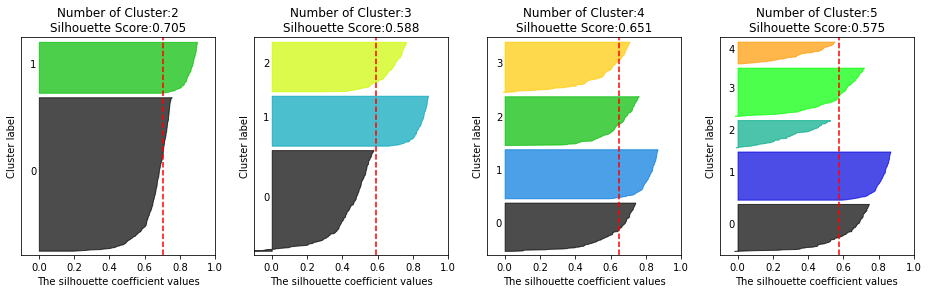

In [11]:
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터셋 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box =(-10.0,10.0), shuffle=True, random_state=1)

# cluster 개수를 2,3,4,5 개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2,3,4,5,],X)

* https://velog.io/@sset2323/07-02.-%EA%B5%B0%EC%A7%91-%ED%8F%89%EA%B0%80Cluster-Evaluation